# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the "Materials and Methods" section, the dataset contains data from 17 phone campaigns conducted between May 2008 and November 2010, involving 79354 contacts. The campaigns promoted a long-term deposit application with favorable interest rates. Attributes were recorded for each contact, including whether the campaign was successful. Overall, 6499 successes were recorded, corresponding to an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [866]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures, StandardScaler, OrdinalEncoder, MinMaxScaler

In [867]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [868]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [869]:
df.shape

(41188, 21)

In [870]:
#Understand the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [871]:
#Understand the basic statistics of the numerical columns.

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [872]:
#Try to get more info on the columns available in the data

df.value_counts()

age  job          marital  education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
36   retired      married  unknown              no       no       no    telephone  jul    thu          88        1         999    0         nonexistent   1.4          93.918          -42.7          4.966      5228.1       no     2
39   blue-collar  married  basic.6y             no       no       no    telephone  may    thu          124       1         999    0         nonexistent   1.1          93.994          -36.4          4.855      5191.0       no     2
27   technician   single   professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
55   services     married  high.school          unknown  no       no    cellular 

In [873]:
#Find the number of null values in each column of the daataset. From the results there are no null values, so we are good.

null_counts_sorted = df.isnull().sum().sort_values()
null_counts_sorted

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

In [874]:
#Rename the columns into something more meaningful and easier to understand

df = df.rename(columns={'euribor3m': 'euribor_3m_rate', 'cons.conf.idx': 'consumer_confidence_index', 'cons.price.idx': 'consumer_price_index', 
                        'emp.var.rate' : 'emp_variation_rate', 'nr.employed': 'num_employees', 'y': 'deposit', 'pdays':'previous_contact', 'poutcome':'previous_outcome'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  duration                   41188 non-null  int64  
 11  campaign                   41188 non-null  int64  
 12  previous_contact           41188 non-null  int64  
 13  previous                   41188 non-null  int

In [875]:
#lets see class distribution
class_distribution = df['deposit'].value_counts()
class_distribution

deposit
no     36548
yes     4640
Name: count, dtype: int64

In [876]:
#Find duplicates and drop them. The result shows there are 12 duplicates

print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

(41188, 21)
12
(41176, 21)


In [877]:
#Drop null values in rows. Accrding to the result, there are no all null values in rows

print(df.shape)
df.dropna(how='all', inplace=True)
df.shape

(41176, 21)


(41176, 21)

In [878]:
#Find the unique values in columns

for col in df:
    print(col, df[col].unique(), "\n")

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital ['married' 'single' 'divorced' 'unknown'] 

education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default ['no' 'unknown' 'yes'] 

housing ['no' 'yes' 'unknown'] 

loan ['no' 'yes' 'unknown'] 

contact ['telephone' 'cellular'] 

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week ['mon' 'tue' 'wed' 'thu' 'fri'] 

duration [ 261  149  226 ... 1246 1556 1868] 

campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 4

In [879]:
#lets visualize how data is distributed

def create_histogram(column):
    return px.histogram(
        df,
        x=column,
        title="Distribution Based on " +column.capitalize(),
        color=column, 
        color_discrete_sequence=px.colors.qualitative.Set2
    )

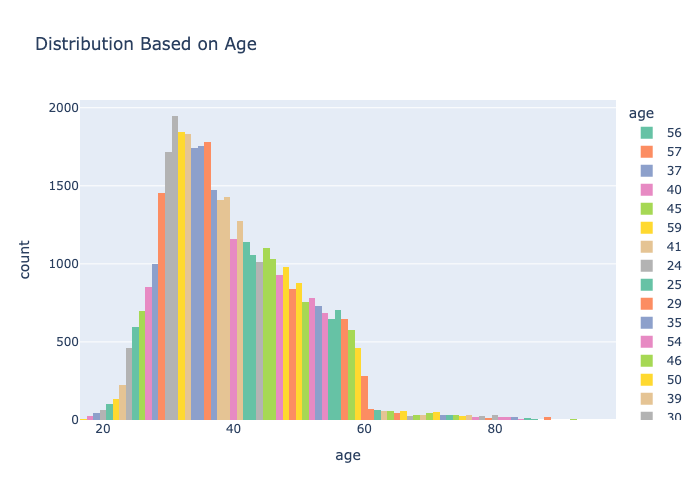

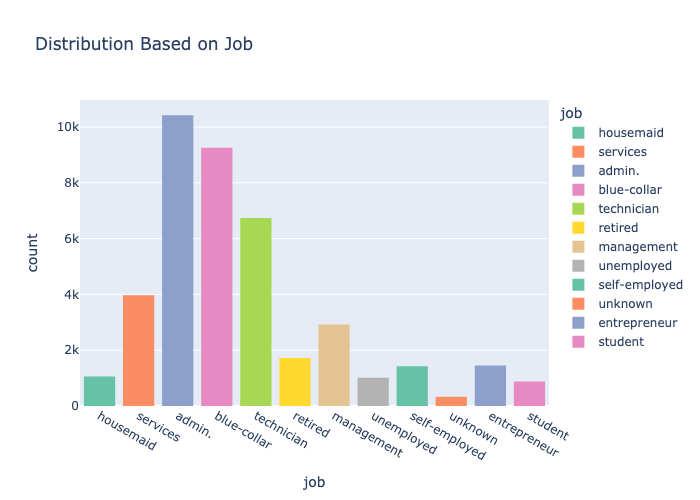

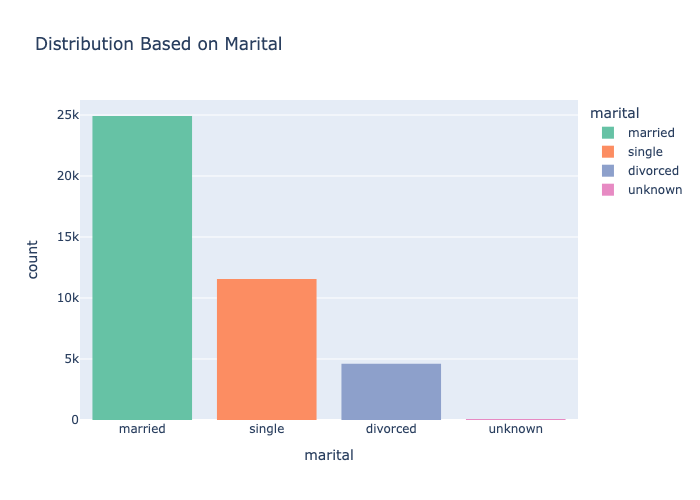

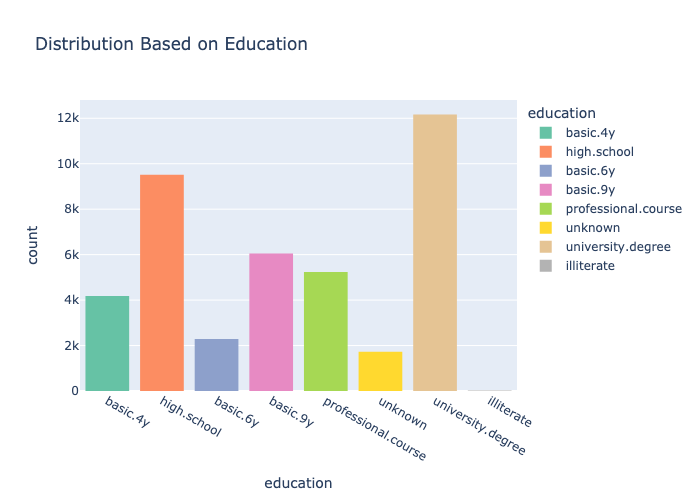

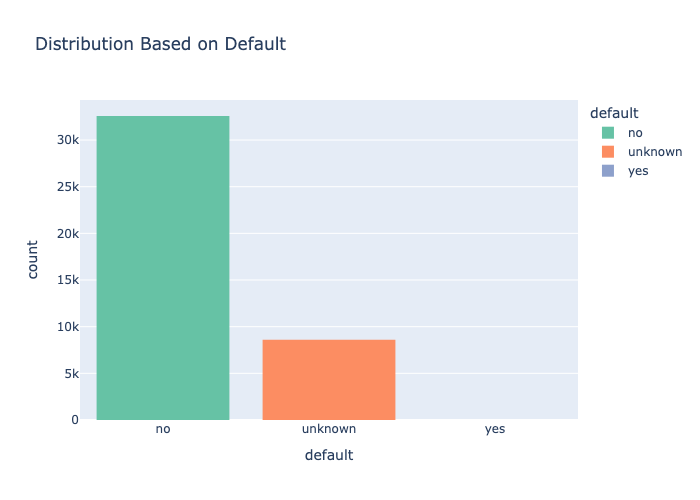

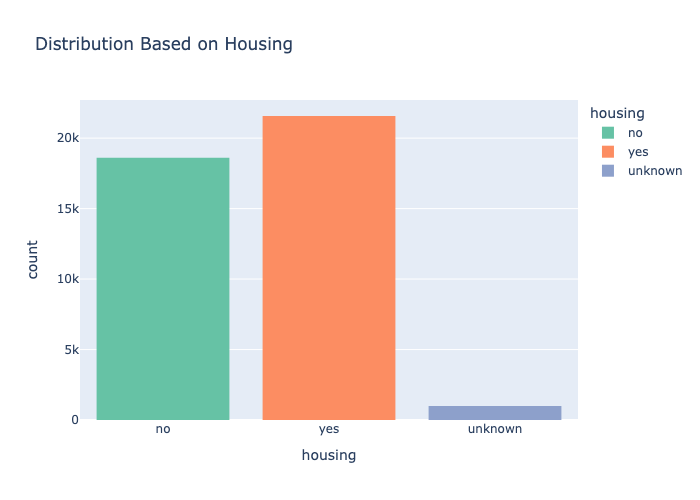

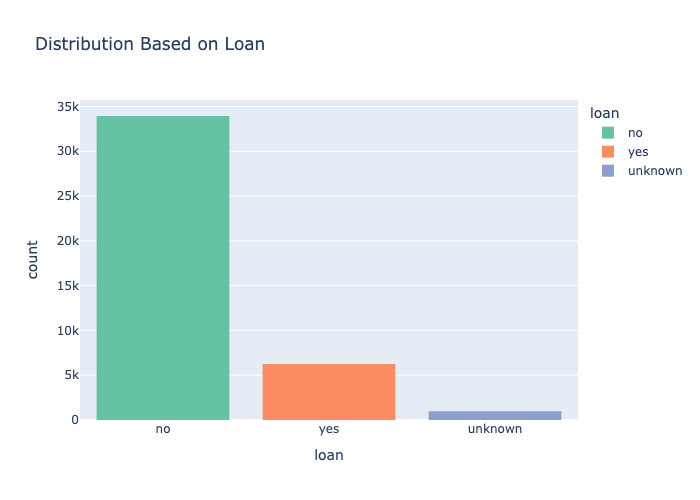

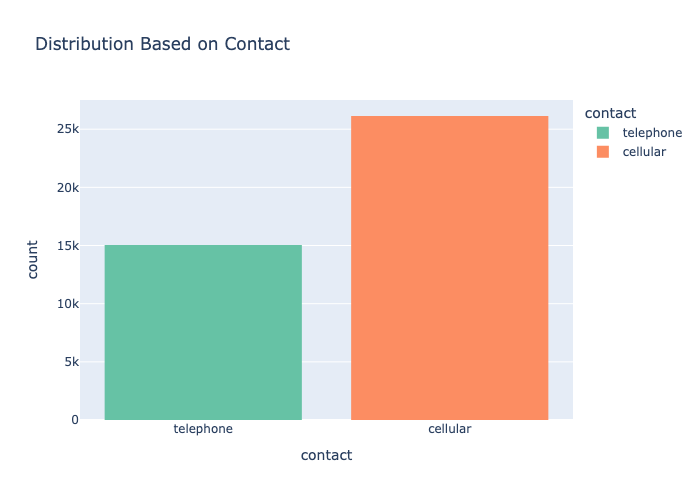

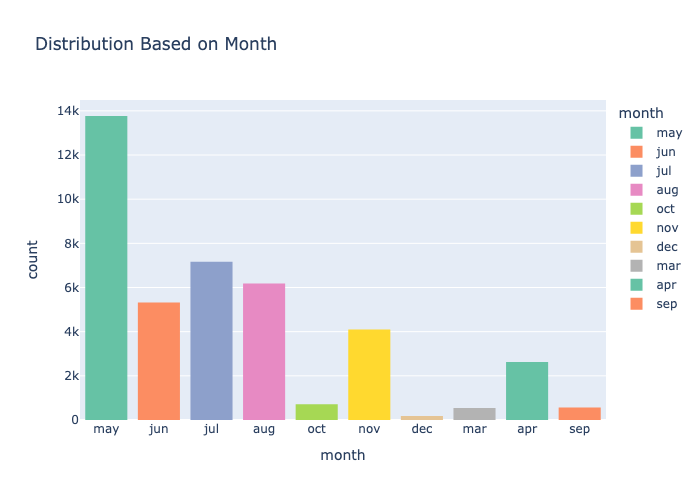

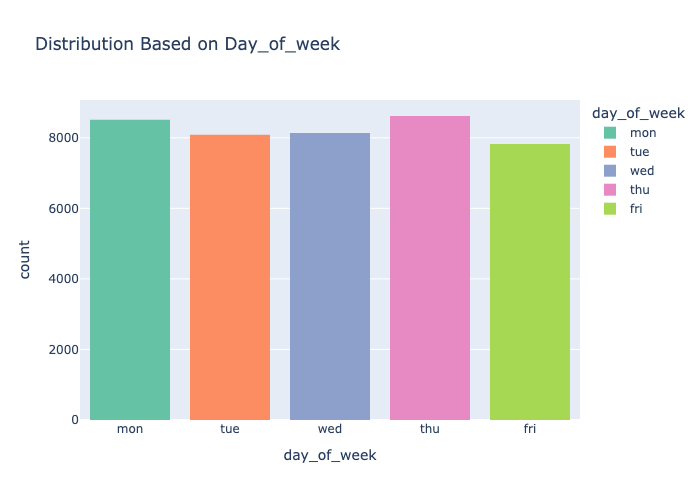

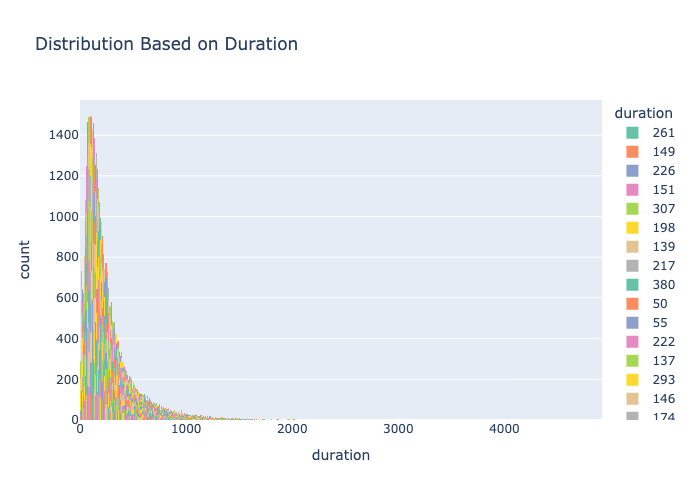

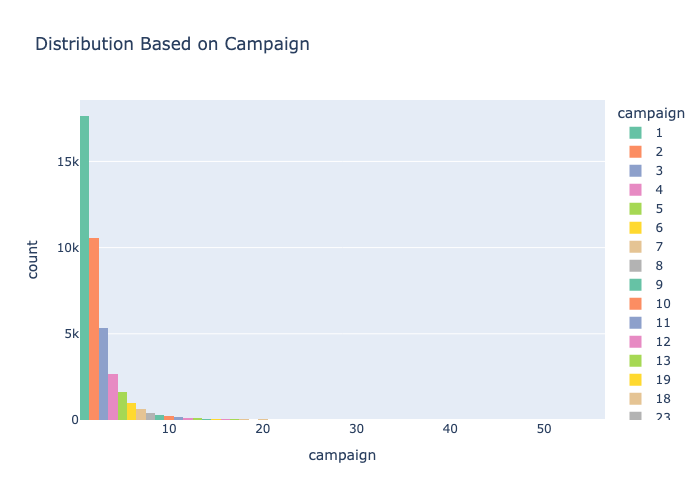

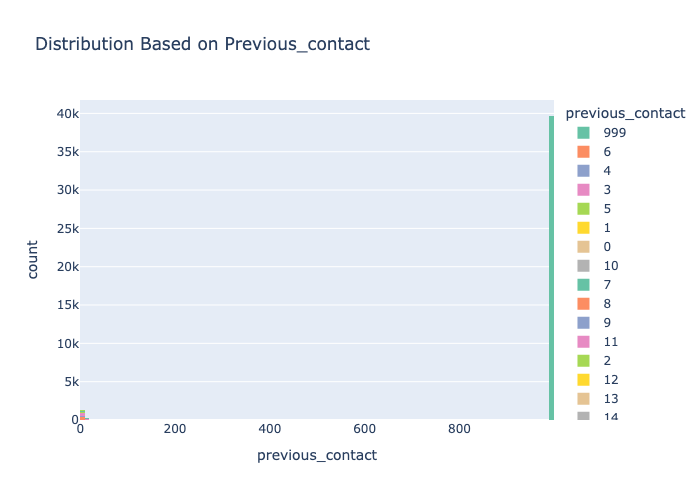

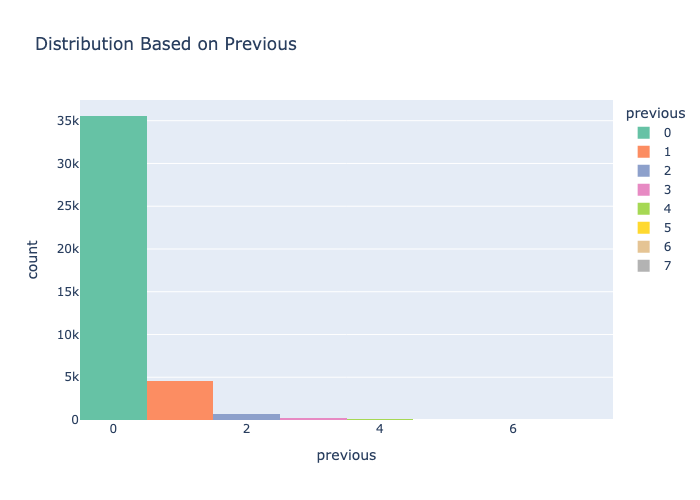

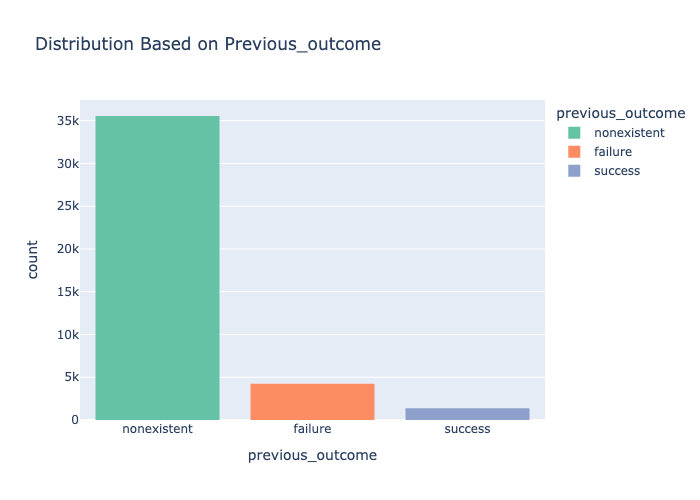

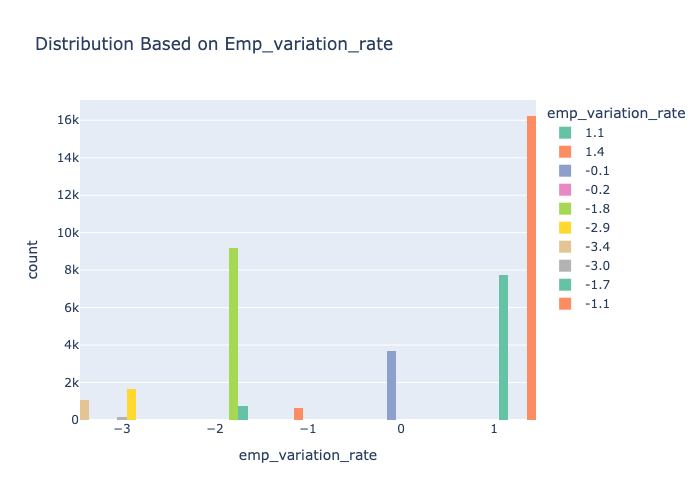

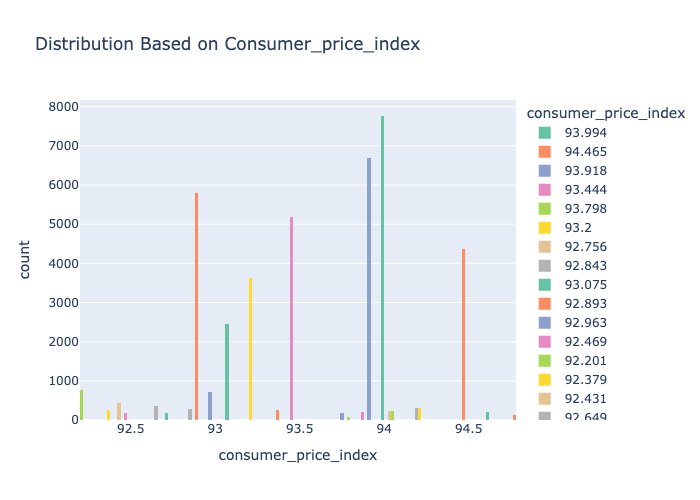

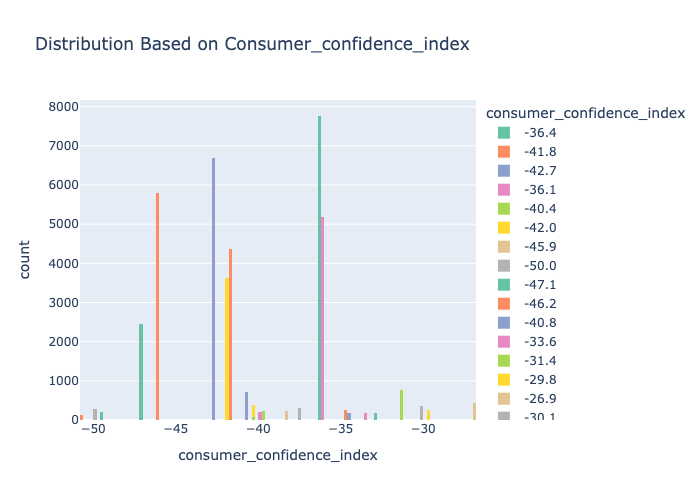

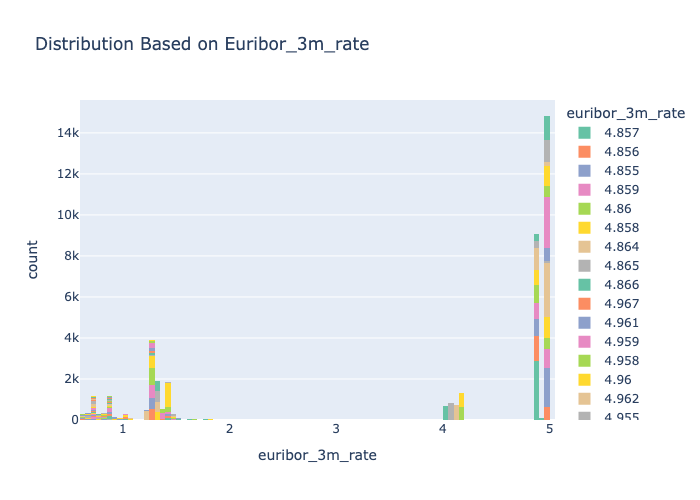

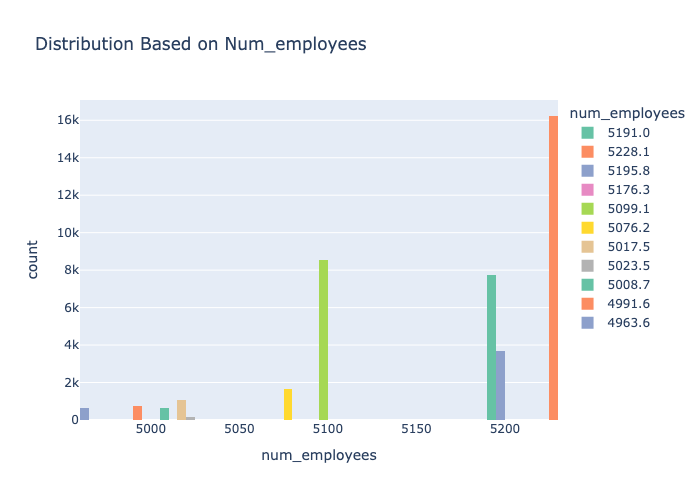

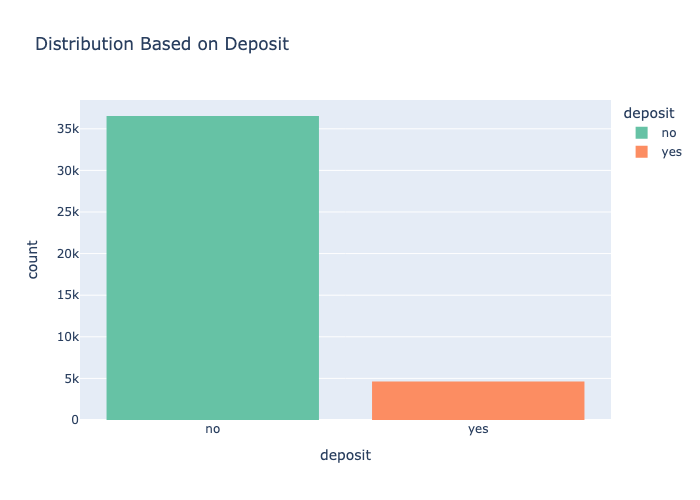

In [880]:
for col in df_clean.columns:
    histplot = create_histogram(col)
    histplot.show("png")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41176 non-null  int64  
 1   job                        41176 non-null  object 
 2   marital                    41176 non-null  object 
 3   education                  41176 non-null  object 
 4   default                    41176 non-null  object 
 5   housing                    41176 non-null  object 
 6   loan                       41176 non-null  object 
 7   contact                    41176 non-null  object 
 8   month                      41176 non-null  object 
 9   day_of_week                41176 non-null  object 
 10  duration                   41176 non-null  int64  
 11  campaign                   41176 non-null  int64  
 12  previous_contact           41176 non-null  int64  
 13  previous                   41176 non-null  int64  


The business objective of this dataset is to improve the effectiveness of marketing campaigns for a Portuguese banking institution by identifying patterns and factors that influence the likelihood of a customer subscribing to a long-term deposit.

Specific Goals:
Increase subscription to term deposits.
Understand which customer attributes and behaviors are most associated with successful deposit subscriptions.
Focus efforts on customers with a higher likelihood of subscribing.
Optimize Resource Allocation.
Improve Customer Engagement

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [882]:
label_encoder = preprocessing.LabelEncoder()

In [883]:
#identify the numeric columns

cols = df.columns
num_cols = df._get_numeric_data().columns

num_cols

Index(['age', 'duration', 'campaign', 'previous_contact', 'previous',
       'emp_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'num_employees'],
      dtype='object')

In [884]:
# Now, take out the numeric colums to find the categorical ones for label encoding

categoricalCols = list(set(cols) - set(num_cols))
categoricalCols

['loan',
 'housing',
 'day_of_week',
 'previous_outcome',
 'contact',
 'job',
 'default',
 'education',
 'deposit',
 'month',
 'marital']

In [885]:
#Create a copy of the dataset to apply label encoding, 
#ensuring the original dataset remains unaffected for future reference or alternative processing.
df_encoded = df.copy()
for col in categoricalCols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    df_encoded[col] = df_encoded[col].astype(str).astype(int)

#print(df_2.head())
print(df_encoded.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  previous_contact  previous  previous_outcome  \
0            1  ...         1               999         0                 1   
1            1  ...         1               999         0                 1   
2            1  ...         1               999         0                 1   
3            1  ...         1               999         0                 1   
4            1  ...         1               999         0                 1   

   emp_variation_rate  consumer_price_index  consumer_confidence_index  \


In [886]:
# Now that encodings are done, we have all numerical data. Let's find the corelation.

correlation_matrix = df_encoded.corr()
correlation_matrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous_contact,previous,previous_outcome,emp_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,num_employees,deposit
age,1.000000,0.001270,-0.389829,-0.117960,0.164939,-0.001477,-0.007359,0.006917,-0.025023,-0.017614,...,0.004622,-0.034381,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.001270,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,...,-0.006865,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.389829,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,...,-0.007189,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.117960,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,...,0.000406,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
default,0.164939,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,...,0.032809,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
housing,-0.001477,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,...,-0.011074,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007359,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,...,0.005119,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.006917,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,...,0.077387,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,-0.025023,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,...,-0.062128,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
day_of_week,-0.017614,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,...,-0.038254,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


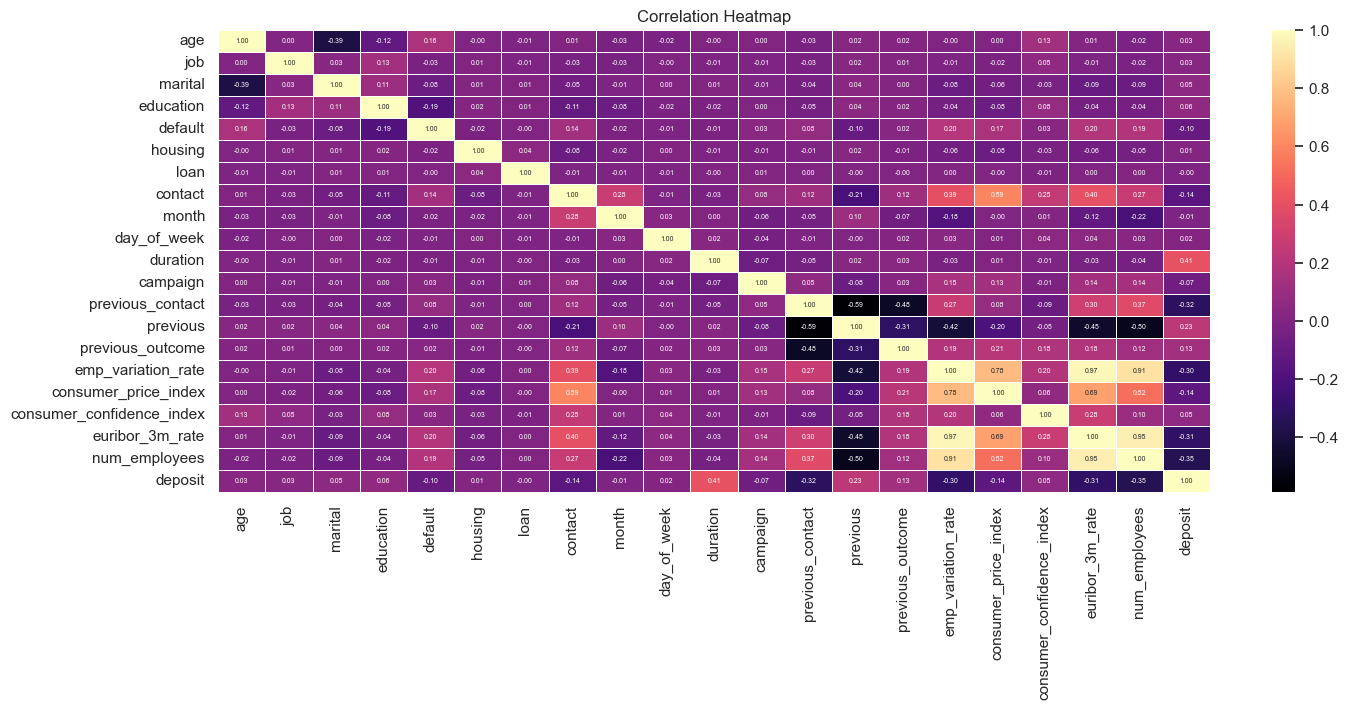

In [887]:
#Lets also create a heatmap
plt.figure(figsize=(16, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,    
    fmt=".2f",            
    linewidths=0.5,
    cmap = "magma"
)
plt.title("Correlation Heatmap")
plt.show("png")

Notable Positive Correlations:

emp_variation_rate & consumer_price_index (~0.78)
consumer_price_index & euribor_3m_rate (~0.69)
euribor_3m_rate & num_employees (~0.91)

Notable Negative Correlations:
emp_variation_rate & deposit (~-0.30)
euribor_3m_rate & deposit (~-0.35)
previous_contact & previous (~-0.48)

Weak or No Correlation:
Many features such as age, job, marital, and education show weak or no correlation with deposit (values close to 0).

Target Variable (deposit):
The heatmap highlights weak-to-moderate relationships between the target (deposit) and some predictors, such as: duration (~0.41): Strongest positive correlation with deposit.

In [888]:
#lets see class distribution
class_distribution = df['deposit'].value_counts()
class_distribution

deposit
no     36537
yes     4639
Name: count, dtype: int64

In [889]:
X = df_encoded.drop('deposit', axis = 1)
y = df_encoded['deposit']

In [890]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(y_resampled.value_counts())

deposit
1    35232
0    30157
Name: count, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [891]:
#Create train and test set using train_test_split. Considering a 70:30 split here.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [892]:
#Using MinMaxScaler to keep values positive

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [893]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train_scaled, y_train)
y_pred = dummy_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Baseline Accuracy:", accuracy)

Baseline Accuracy: 0.5451903960850283


In [894]:
#Find and print metrics

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5451903960850283
Precision: 0.29723256798335
Recall: 0.5451903960850283
F1-score: 0.3847196678628515


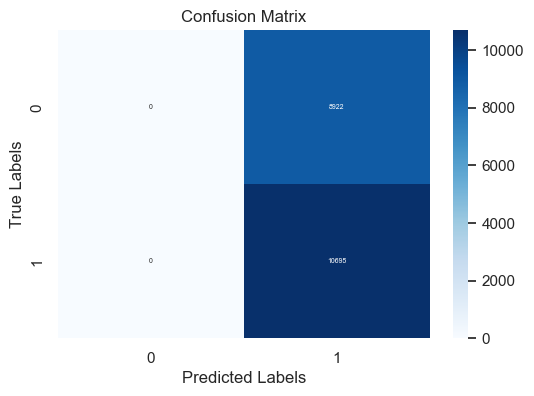

In [895]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

class_labels = df_encoded['deposit'].unique()
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [896]:
from sklearn.linear_model import LogisticRegression
import time

train_times = []

# Define a basic logistic regression model
model_lr = LogisticRegression()

start_time = time.time()
model_lr.fit(X_train_scaled, y_train)
end_time = time.time()
total_time = (end_time - start_time)

y_train_pred_lr = model_lr.predict(X_train_scaled)
y_test_pred_lr = model_lr.predict(X_test_scaled)

### Problem 9: Score the Model

What is the accuracy of your model?

In [897]:
#Lets first write a method for evalution that can be used by other models too

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

train_accuracy_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
models = []

def evaluate(y_train_pred, y_test_pred, model, total_time):
    print("Model: "+model)
    print("Accuracy of train:", accuracy_score(y_train, y_train_pred))
    print("Accuracy of test:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_test_pred, average='weighted'))
    print(classification_report(y_test, y_test_pred))
    
    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    precision_scores.append(precision_score(y_test, y_test_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_test_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
    models.append(model)
    train_times.append(total_time)

In [898]:
def plot_roc(y_test_pred, model):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)

    sns.set(style="whitegrid")

    plt.figure(figsize=(6, 4))
    sns.lineplot(x=fpr, y=tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')

    plt.title("ROC Curve for "+model, fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

Model: LogisticRegression
Accuracy of train: 0.9420606484313554
Accuracy of test: 0.9424988530356324
Precision: 0.9425432667621839
Recall: 0.9424988530356324
F1-score: 0.9425133310668259
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8922
           1       0.95      0.94      0.95     10695

    accuracy                           0.94     19617
   macro avg       0.94      0.94      0.94     19617
weighted avg       0.94      0.94      0.94     19617



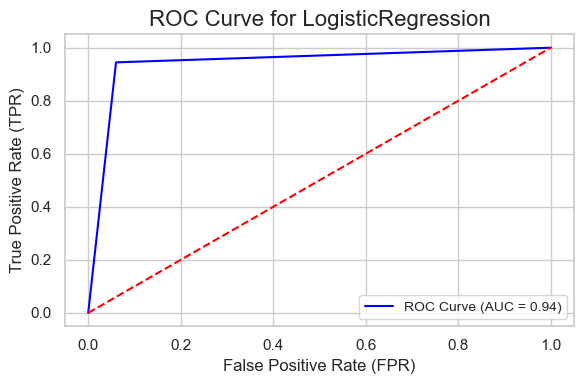

In [899]:
evaluate(y_train_pred_lr,y_test_pred_lr, "LogisticRegression", total_time)
plot_roc(y_test_pred_lr, "LogisticRegression")

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [900]:
from sklearn.neighbors import KNeighborsClassifier

# Define a basic KNN model
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(X_train_scaled, y_train)
end_time = time.time()
total_time = (end_time - start_time)

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

evaluate(y_train_pred_knn,y_test_pred_knn, "KNN", total_time)

Model: KNN
Accuracy of train: 0.9448571178886656
Accuracy of test: 0.9169088035887241
Precision: 0.9179193656063129
Recall: 0.9169088035887241
F1-score: 0.9170283894385476
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8922
           1       0.94      0.91      0.92     10695

    accuracy                           0.92     19617
   macro avg       0.92      0.92      0.92     19617
weighted avg       0.92      0.92      0.92     19617



Model: DecisionTreeClassifier
Accuracy of train: 1.0
Accuracy of test: 0.9731865218942753
Precision: 0.9731848055382956
Recall: 0.9731865218942753
F1-score: 0.9731811645744431
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8922
           1       0.97      0.98      0.98     10695

    accuracy                           0.97     19617
   macro avg       0.97      0.97      0.97     19617
weighted avg       0.97      0.97      0.97     19617



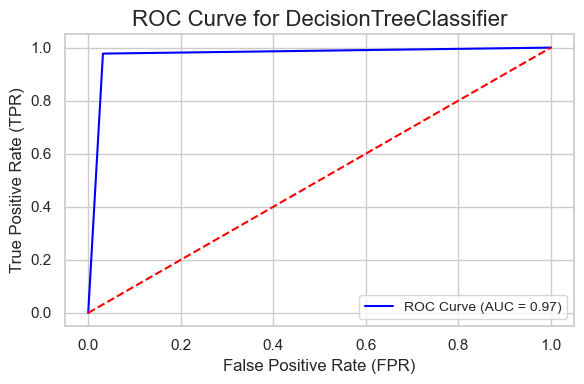

In [901]:
from sklearn.tree import DecisionTreeClassifier

# Define a basic Decision Tree model
decision_tree = DecisionTreeClassifier()

start_time = time.time()
decision_tree.fit(X_train_scaled, y_train)
end_time = time.time()
total_time = (end_time - start_time)

y_train_pred_dt = decision_tree.predict(X_train_scaled)
y_test_pred_dt = decision_tree.predict(X_test_scaled)

evaluate(y_train_pred_dt,y_test_pred_dt, "DecisionTreeClassifier", total_time)
plot_roc(y_test_pred_dt, "DecisionTreeClassifier")


|--- feature_10 <= 0.06
|   |--- feature_19 <= 0.51
|   |   |--- feature_10 <= 0.02
|   |   |   |--- truncated branch of depth 7
|   |   |--- feature_10 >  0.02
|   |   |   |--- truncated branch of depth 19
|   |--- feature_19 >  0.51
|   |   |--- feature_17 <= 0.19
|   |   |   |--- truncated branch of depth 20
|   |   |--- feature_17 >  0.19
|   |   |   |--- truncated branch of depth 17
|--- feature_10 >  0.06
|   |--- feature_7 <= 0.50
|   |   |--- feature_10 <= 0.10
|   |   |   |--- truncated branch of depth 17
|   |   |--- feature_10 >  0.10
|   |   |   |--- truncated branch of depth 23
|   |--- feature_7 >  0.50
|   |   |--- feature_10 <= 0.12
|   |   |   |--- truncated branch of depth 12
|   |   |--- feature_10 >  0.12
|   |   |   |--- truncated branch of depth 17



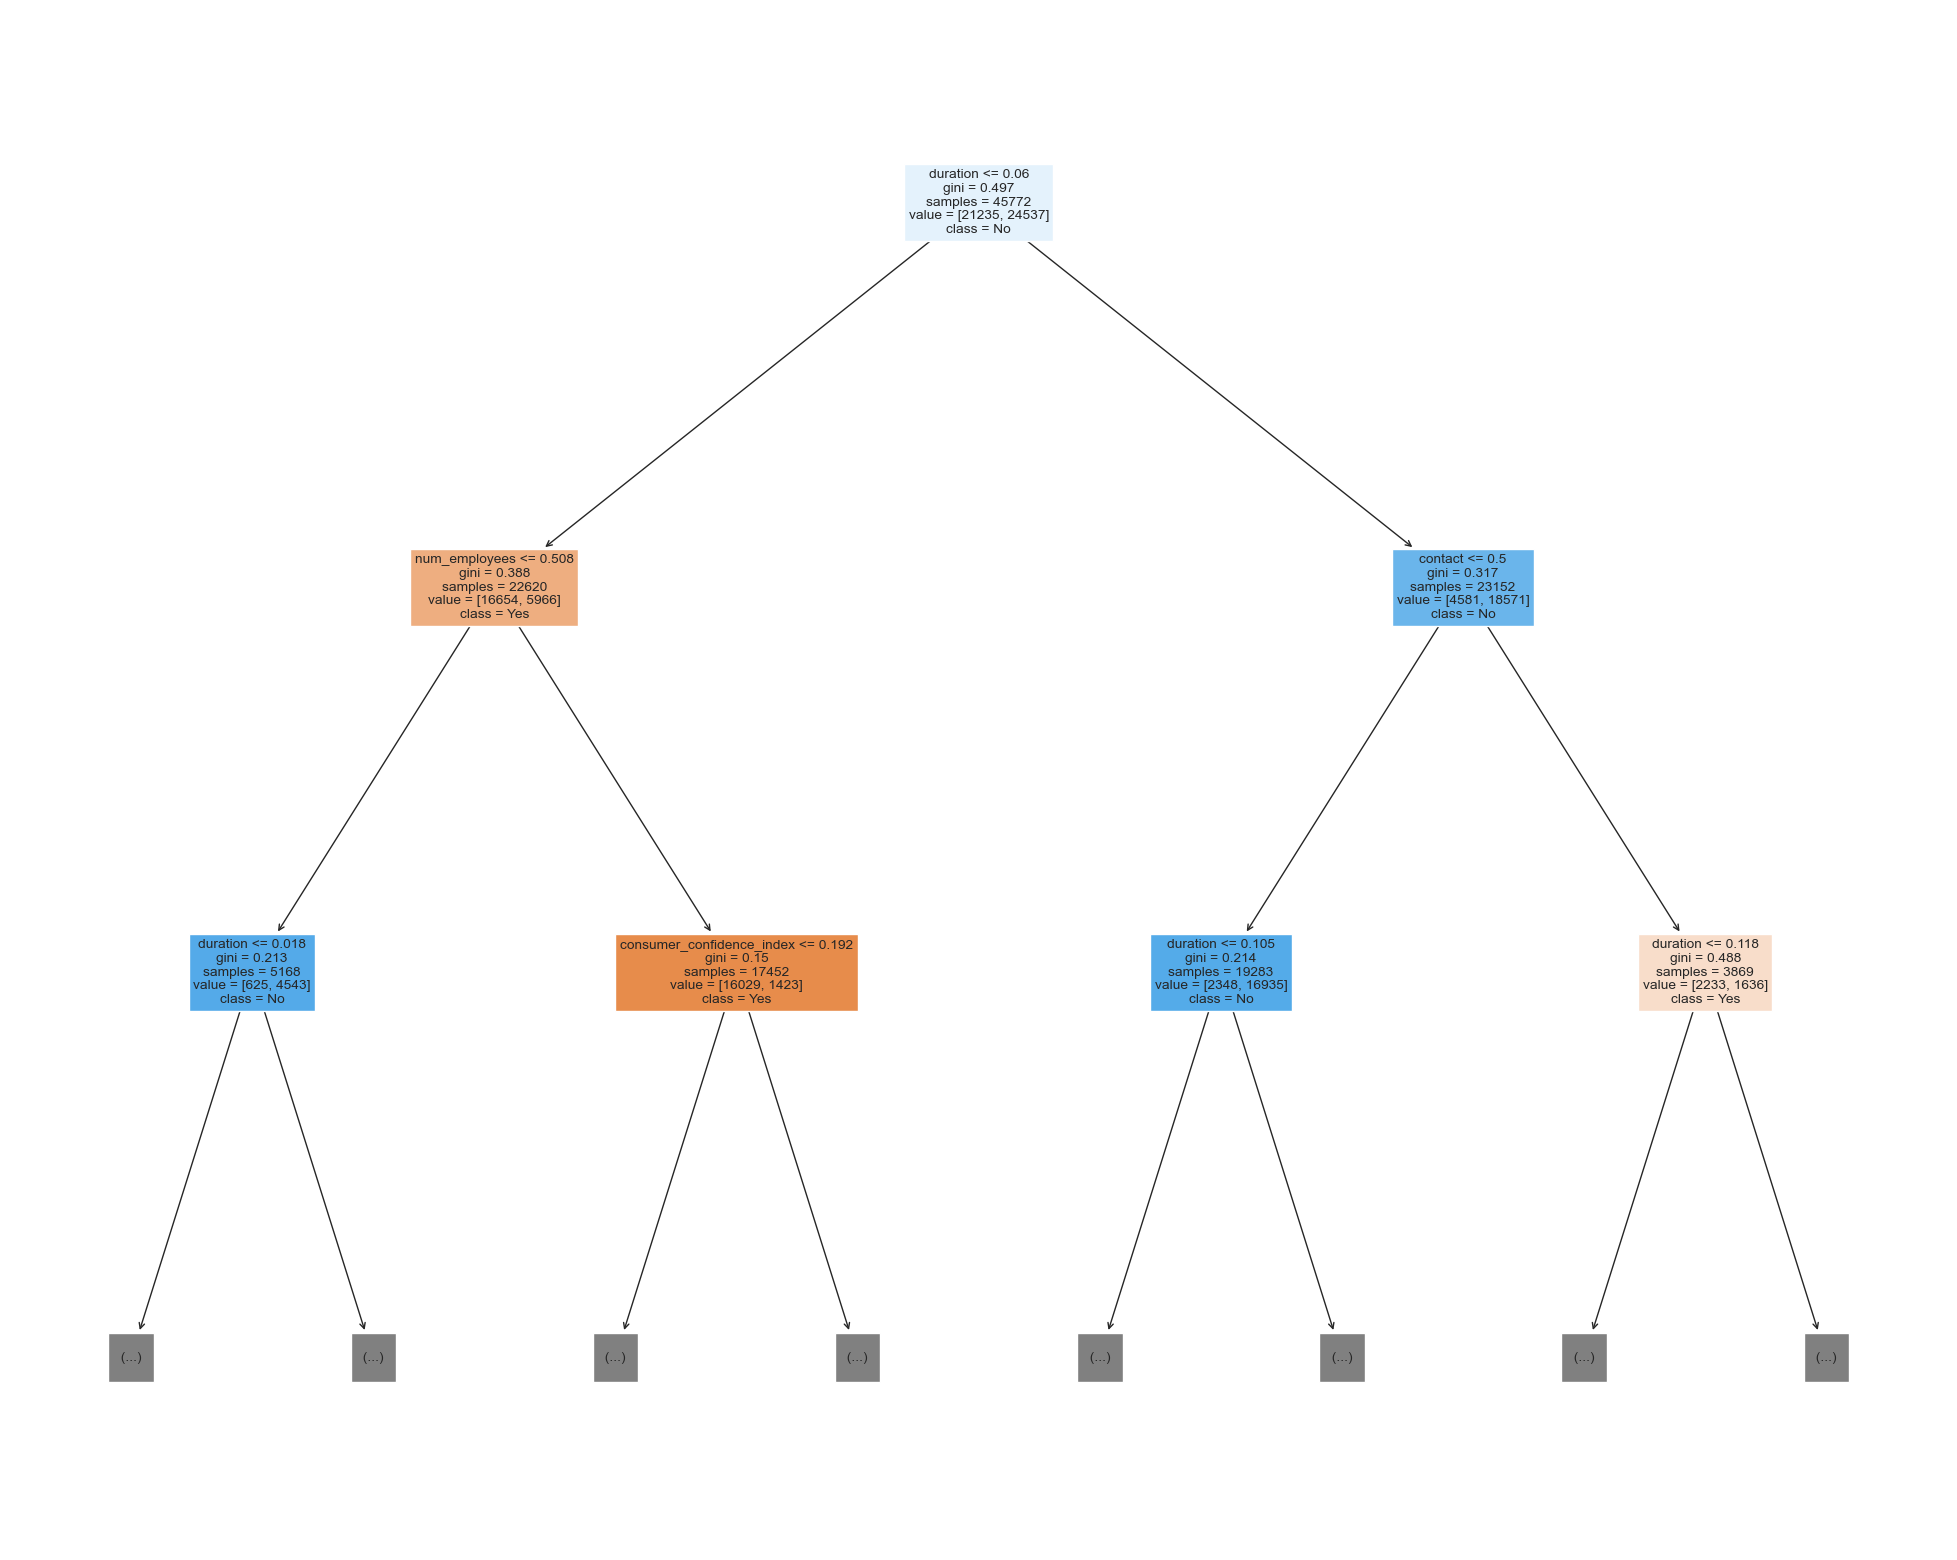

In [902]:
# Lets try plotting a simple decision tree. Since we have a lot of features, we will try with depth = 2

from sklearn import tree

text_representation = tree.export_text(decision_tree, max_depth=2)
print(text_representation)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True,
                   max_depth = 2)

Model: SVM
Accuracy of train: 0.9621165778205016
Accuracy of test: 0.9609522353061121
Precision: 0.9609587262976919
Recall: 0.9609522353061121
F1-score: 0.9609350672529553
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8922
           1       0.96      0.97      0.96     10695

    accuracy                           0.96     19617
   macro avg       0.96      0.96      0.96     19617
weighted avg       0.96      0.96      0.96     19617



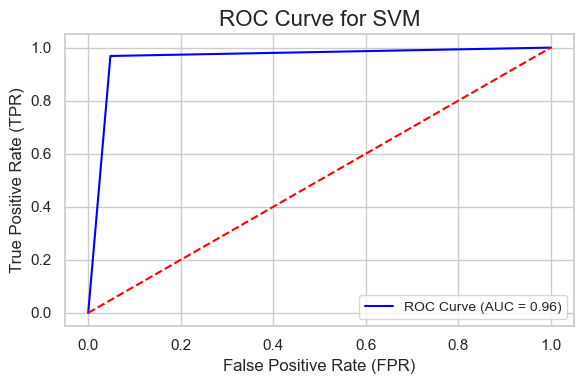

In [903]:
from sklearn.svm import SVC

# Define a basic SVM model
svm = SVC()

start_time = time.time()
svm.fit(X_train_scaled, y_train)
end_time = time.time()
total_time = (end_time - start_time)

y_train_pred_svm = svm.predict(X_train_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

evaluate(y_train_pred_svm,y_test_pred_svm, "SVM", total_time)
plot_roc(y_test_pred_svm, "SVM")


In [904]:
df1 = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Precision': precision_scores, 'Recall': recall_scores})
print(df1)

                    Model  Accuracy  F1 Score  Precision    Recall
0      LogisticRegression  0.942499  0.942513   0.942543  0.942499
1                     KNN  0.916909  0.917028   0.917919  0.916909
2  DecisionTreeClassifier  0.973187  0.973181   0.973185  0.973187
3                     SVM  0.960952  0.960935   0.960959  0.960952


In [905]:
df2 = pd.DataFrame({'Model': models, 'Train Time':train_times, 'Train Accuracy': train_accuracy_scores,'Test Accuracy': accuracy_scores})
print(df2)

                    Model  Train Time  Train Accuracy  Test Accuracy
0      LogisticRegression    0.146294        0.942061       0.942499
1                     KNN    0.003739        0.944857       0.916909
2  DecisionTreeClassifier    0.150485        1.000000       0.973187
3                     SVM    7.039852        0.962117       0.960952


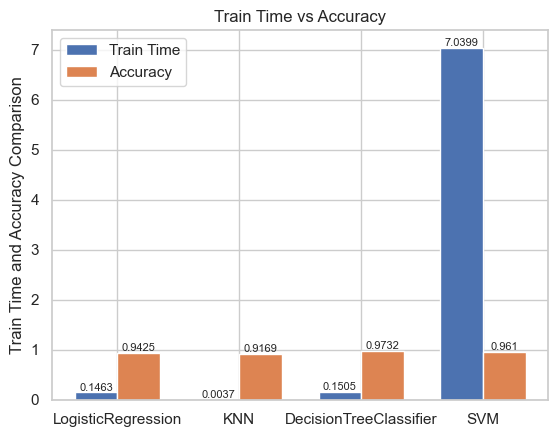

In [906]:
fig, ax = plt.subplots()

bar_width = 0.35
x_pos = range(len(models))

bar1 = ax.bar(x_pos, train_times, bar_width, label='Train Time')
bar2 = ax.bar([x + bar_width for x in x_pos], accuracy_scores, bar_width, label='Accuracy')

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height,4)}', ha='center', va='bottom', fontsize=8)

ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(models)
ax.set_ylabel('Train Time and Accuracy Comparison')
ax.set_title('Train Time vs Accuracy')
ax.legend()

plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [907]:
# train_accuracy_scores = []
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# models = []


In [908]:
from sklearn.metrics import roc_auc_score

def train_model(grid, model_name):
    start_time = time.time()
    grid.fit(X_train_scaled, y_train)
    end_time = time.time()
    total_time = (end_time - start_time)

    print("Best Parameters:", grid.best_params_)

    y_train_pred = grid.best_estimator_.predict(X_train_scaled)
    y_test_pred = grid.best_estimator_.predict(X_test_scaled)
    y_test_prob = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]

    evaluate(y_train_pred,y_test_pred, model_name, total_time)
    plot_roc(y_test_prob,model_name)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Model: LogisticRegression_Improved
Accuracy of train: 0.9436773573363628
Accuracy of test: 0.9427027578121018
Precision: 0.9427389669159016
Recall: 0.9427027578121018
F1-score: 0.9427151820583601
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8922
           1       0.95      0.95      0.95     10695

    accuracy                           0.94     19617
   macro avg       0.94      0.94      0.94     19617
weighted avg       0.94      0.94      0.94     19617



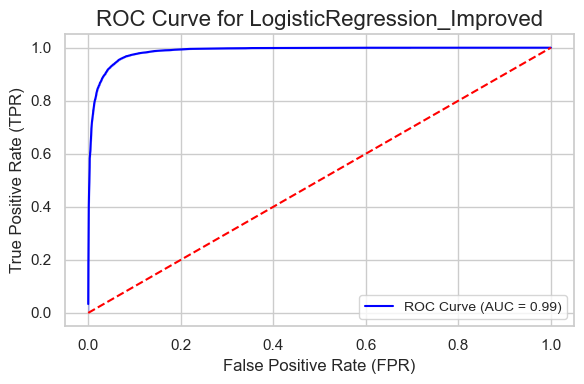

In [909]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200]
}

model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,
    verbose=1,
    n_jobs=-1
)

train_model(grid_search, "LogisticRegression_Improved")

In [910]:
#Before we move further, lets sort the features according to importance.
from sklearn.inspection import permutation_importance

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]}")

housing: 0.002139444131829149
loan: 0.002283727185239204
marital: 0.0022954228663376376
previous_outcome: 0.002413485719935904
previous: 0.00542224850873696
campaign: 0.00842800976925473
education: 0.009238862355782218
job: 0.009675192055316273
default: 0.012011542610053882
day_of_week: 0.01228867618346069
previous_contact: 0.017577048307397182
age: 0.027280220362669416
euribor_3m_rate: 0.08068169289585636
contact: 0.10035844592294826
consumer_confidence_index: 0.10040410204631509
month: 0.1266820154906494
consumer_price_index: 0.2743844530937126
num_employees: 0.320253358089888
emp_variation_rate: 0.3538809617092879
duration: 0.9564254418694291


<Axes: >

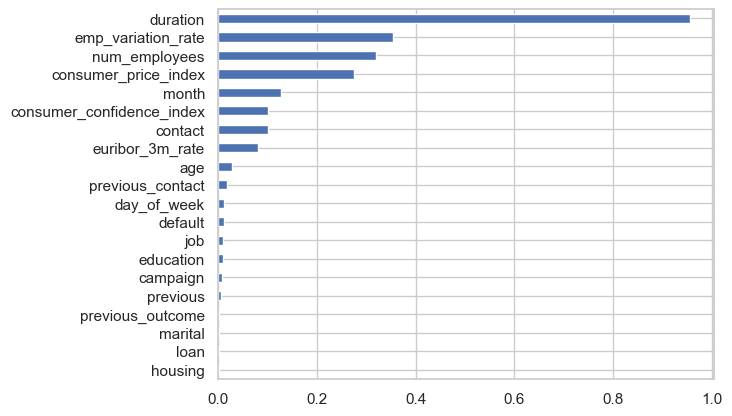

In [911]:
type(perm_importance.importances_mean.argsort())
feat_importances = pd.Series(perm_importance.importances_mean, index=X.columns)
feat_importances.sort_values().plot(kind='barh')

In [912]:
#create a dataset of 5 most important features
df_top5 = df_encoded[['duration', 'num_employees', 'month', 'euribor_3m_rate', 'consumer_confidence_index','deposit' ]]

In [913]:
X_top5 = df_top5.drop('deposit', axis = 1)
y_top5 = df_top5['deposit']

smote_enn = SMOTEENN(random_state=42)
X_resampled_top5, y_resampled_top5 = smote_enn.fit_resample(X_top5, y_top5)

X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_resampled_top5, y_resampled_top5, test_size=0.3, random_state=42, stratify=y_resampled_top5)

scaler = MinMaxScaler()
X_train_scaled_top5 = scaler.fit_transform(X_train_top5)
X_test_scaled_top5 = scaler.transform(X_test_top5)


grid_search.fit(X_train_scaled_top5, y_train_top5)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score: 0.9252550826250486


In [914]:
# Make predictions
y_pred_top5 = grid_search.best_estimator_.predict(X_test_scaled_top5)
y_prob_top5 = grid_search.best_estimator_.predict_proba(X_test_scaled_top5)[:, 1]

# Evaluate model
print(classification_report(y_test_top5, y_pred_top5))
print("ROC-AUC Score:", roc_auc_score(y_test_top5, y_prob_top5))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9232
           1       0.92      0.93      0.92      8492

    accuracy                           0.93     17724
   macro avg       0.93      0.93      0.93     17724
weighted avg       0.93      0.93      0.93     17724

ROC-AUC Score: 0.9778319815836457


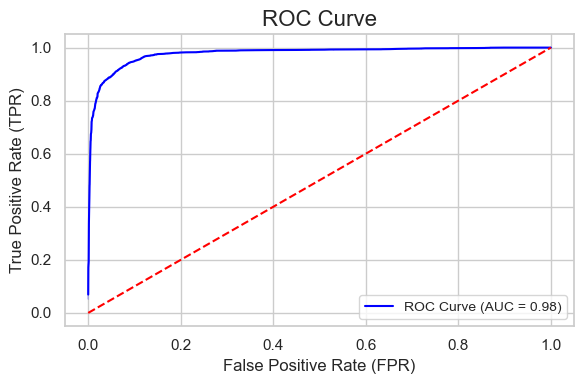

In [915]:
y_test_prob = grid_search.best_estimator_.predict_proba(X_test_scaled_top5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_top5, y_test_prob)
roc_auc = auc(fpr, tpr)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.lineplot(x=fpr, y=tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

Reducing the number of features certainly reduced the training time, but didnt improve efficiency. Also since dataset size is small, lets move ahead with all features.

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Model: KNN_Improved
Accuracy of train: 1.0
Accuracy of test: 0.9396951623591783
Precision: 0.940271971498542
Recall: 0.9396951623591783
F1-score: 0.9397646191242223
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8922
           1       0.96      0.93      0.94     10695

    accuracy                           0.94     19617
   macro avg       0.94      0.94      0.94     19617
weighted avg       0.94      0.94      0.94     19617



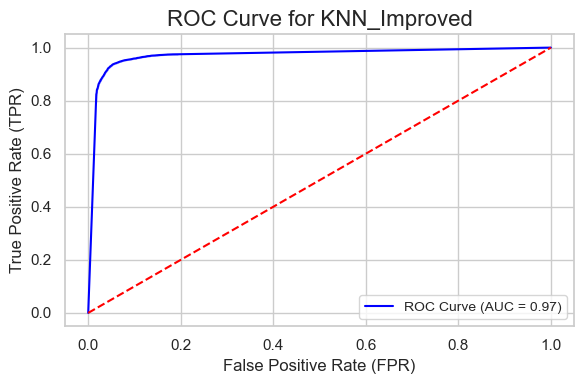

In [916]:
# Lets train a KNN classifier

from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': range(1,15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

train_model(grid_search_knn, "KNN_Improved")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model: DecisionTree_Improved
Accuracy of train: 0.9809927466573451
Accuracy of test: 0.9725748075648672
Precision: 0.9725760717319771
Recall: 0.9725748075648672
F1-score: 0.9725674441716412
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8922
           1       0.97      0.98      0.97     10695

    accuracy                           0.97     19617
   macro avg       0.97      0.97      0.97     19617
weighted avg       0.97      0.97      0.97     19617



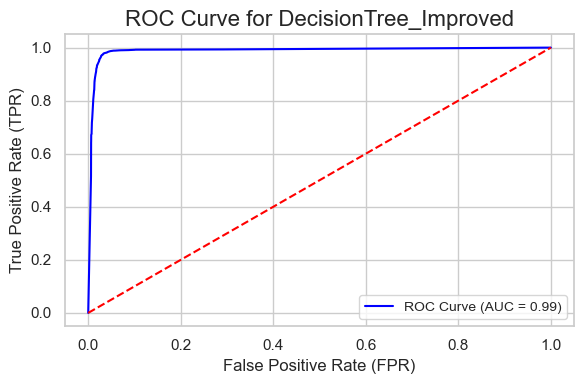

In [917]:
# Lets train a DecisionTree classifier

from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}


dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

train_model(grid_search_dt, "DecisionTree_Improved")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10}
Model: SVC_Improved
Accuracy of train: 0.9715109674036528
Accuracy of test: 0.9662027833001988
Precision: 0.9662018852500194
Recall: 0.9662027833001988
F1-score: 0.966202311504184
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8922
           1       0.97      0.97      0.97     10695

    accuracy                           0.97     19617
   macro avg       0.97      0.97      0.97     19617
weighted avg       0.97      0.97      0.97     19617



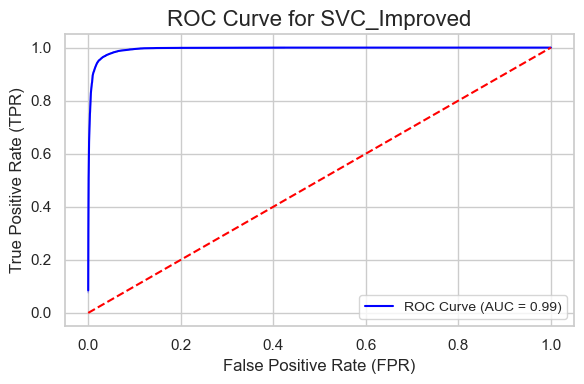

In [918]:
#Lets train a SVM. Since this was taking a lot of time and had become a computationla challenge, I have used RandomizedSearchCV to enhance efficiency.

from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

svc = SVC(probability=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=10, 
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

train_model(random_search, "SVC_Improved")

In [919]:
df3 = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Precision': precision_scores, 'Recall': recall_scores})
print(df3)

                         Model  Accuracy  F1 Score  Precision    Recall
0           LogisticRegression  0.942499  0.942513   0.942543  0.942499
1                          KNN  0.916909  0.917028   0.917919  0.916909
2       DecisionTreeClassifier  0.973187  0.973181   0.973185  0.973187
3                          SVM  0.960952  0.960935   0.960959  0.960952
4  LogisticRegression_Improved  0.942703  0.942715   0.942739  0.942703
5                 KNN_Improved  0.939695  0.939765   0.940272  0.939695
6        DecisionTree_Improved  0.972575  0.972567   0.972576  0.972575
7                 SVC_Improved  0.966203  0.966202   0.966202  0.966203


In [920]:
df4 = pd.DataFrame({'Model': models, 'Train Time':train_times, 'Train Accuracy': train_accuracy_scores,'Test Accuracy': accuracy_scores})
print(df4)

                         Model  Train Time  Train Accuracy  Test Accuracy
0           LogisticRegression    0.146294        0.942061       0.942499
1                          KNN    0.003739        0.944857       0.916909
2       DecisionTreeClassifier    0.150485        1.000000       0.973187
3                          SVM    7.039852        0.962117       0.960952
4  LogisticRegression_Improved    4.421879        0.943677       0.942703
5                 KNN_Improved  373.188177        1.000000       0.939695
6        DecisionTree_Improved   13.961179        0.980993       0.972575
7                 SVC_Improved  195.118538        0.971511       0.966203


/var/folders/55/x837yjcj345fvyz78_wh348h0000gn/T/ipykernel_37272/577717350.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



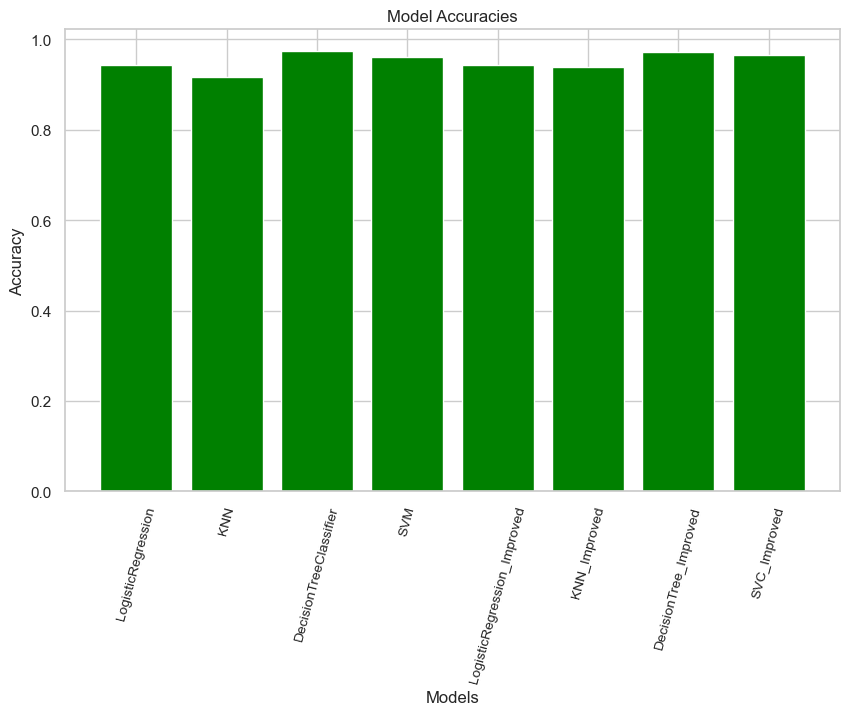

In [929]:
# Create bar graph for test accuracies
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.bar(models, accuracy_scores, color="green") 
ax.set_xticklabels(models, rotation=75, fontsize=10)

plt.rcParams.update({'font.size': 5})
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

plt.show()

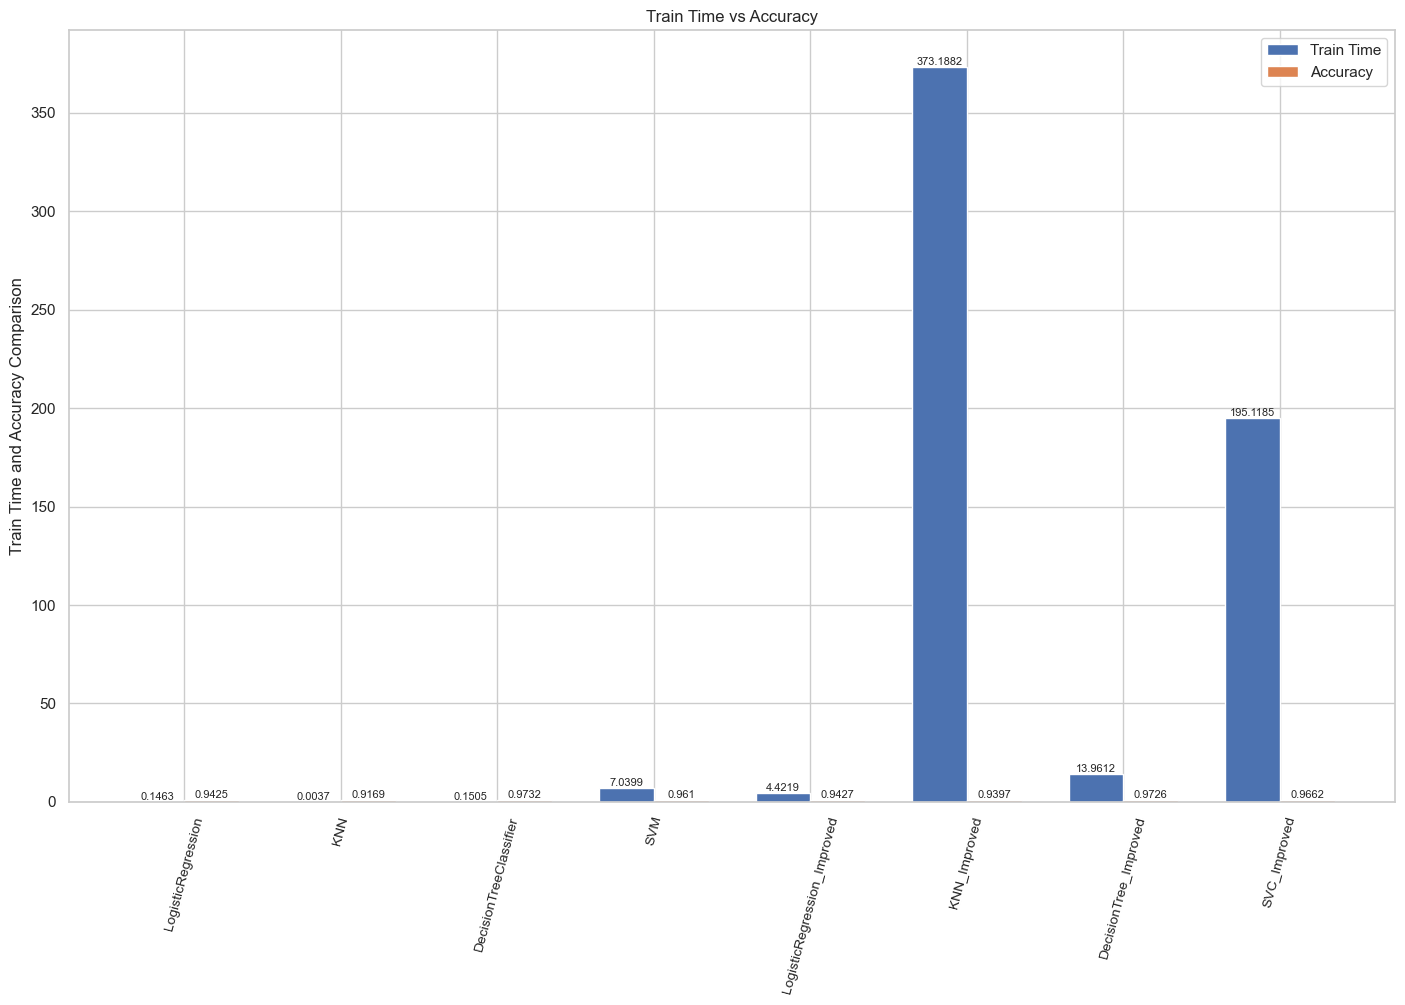

In [921]:
fig, ax = plt.subplots(figsize=(14, 10))

bar_width = 0.35
x_pos = range(len(models))

bar1 = ax.bar(x_pos, train_times, bar_width, label='Train Time')
bar2 = ax.bar([x + bar_width for x in x_pos], accuracy_scores, bar_width, label='Accuracy')

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height,4)}', ha='center', va='bottom', fontsize=8)

ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(models, rotation=75, fontsize=10)
ax.set_ylabel('Train Time and Accuracy Comparison')
ax.set_title('Train Time vs Accuracy')
ax.legend()

plt.rcParams.update({'font.size': 5})
plt.tight_layout()
plt.show()

After all the classifiers are traind and tested, its evident that Decision tree performs the bets for this usecase

##### Questions